<a href="https://colab.research.google.com/github/brunoclvrt/Case-2---BNB-price-prediction/blob/main/BNB_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Introduction**

Launched in July 2017, Binance is the biggest cryptocurrency exchange globally based on daily trading volume. Binance aims to bring cryptocurrency exchanges to the forefront of financial activity globally. The idea behind Binance’s name is to show this new paradigm in global finance — Binary Finance, or Binance.

Binance is a unique ecosystem of decentralized, blockchain-based networks. The company has grown to be the leading crypto exchange in a number of countries, and their side organizations are attracting significant interest as well. With an initial maximum supply of 200,000,000 BNB coins, of which 168,137,036 are currently in circulation as of September 2021.

The prupose of this study is predict the BNB price until next 60 days, and answer a simple question: with the actual events running (FED increasing interest rate, Ukraine-Russia war, an lost of investors who are moving to fixed income to protect your money to volatile markets), the BNB price tends to go up or down?

#**Data Gathering**
###To start our exploration, we have to load some libraries

In [ ]:
!pip install yfinance
!pip install fbprophet
!pip install plotly
!pip install gitly==1.0.1

In [ ]:
import pandas as pd # data manipulation
import numpy as np # numeric calculations
import plotly.graph_objs as go
from gitly.colab.plot import GitlyPlotter #library to plot some plotly charts on github

import yfinance as yf # in this library, we can get our stocks
from datetime import date, timedelta #library for time series manipulation
today = date.today()

To continue our capture strategy, we need to pass some informations

In [3]:
end_date = today.strftime("%Y-%m-%d")
start_date = today - timedelta(days=1597) #we are capturing data since 01/01/2018
start_date = start_date.strftime("%Y-%m-%d")

In [4]:
# LOADNG OUR DATASET

df =yf.download("BNB-USD", start=start_date, end=end_date,progress=False) #collect our BNB stocks dataset
df["Date"] = df.index
df[["Open", "High", "Low", "Close", "Adj Close", "Volume"]]
df.reset_index(drop=True,inplace=True)

df.head() #showing the first rows

,Open,High,Low,Close,Adj Close,Volume,Date
0,8.62953,8.700570,7.95922,8.41461,8.41461,66422800,2018-01-01
1,8.45770,9.122590,8.21718,8.83777,8.83777,104789000,2018-01-02
2,8.77014,9.580780,8.52918,9.53588,9.53588,108852000,2018-01-03
3,9.44584,9.538490,8.85413,9.21399,9.21399,158819008,2018-01-04
4,9.14568,16.717699,9.09468,14.91720,14.91720,341504992,2018-01-05


#**Data Exploration**
###Now, we're make some analysis in our dataset

In [5]:
#First of all, let's see the total of rows and columns

df.shape

(1598, 7)

In [6]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1598.000000,1598.000000,1598.000000,1598.000000,1598.000000,1.598000e+03
mean,132.861592,137.680399,127.568523,133.009590,133.009590,9.739478e+08
std,189.532837,196.035522,182.162507,189.466339,189.466339,1.530898e+09
min,4.532951,4.635010,4.189971,4.528650,4.528650,9.284000e+03
25%,13.941175,14.409600,13.500475,13.929775,13.929775,1.283781e+08
50%,21.966192,22.627299,21.124612,22.003480,22.003480,2.992769e+08
75%,293.556961,307.660660,274.888985,293.852974,293.852974,1.482926e+09
max,676.315918,690.931946,634.549500,675.684082,675.684082,1.798295e+10


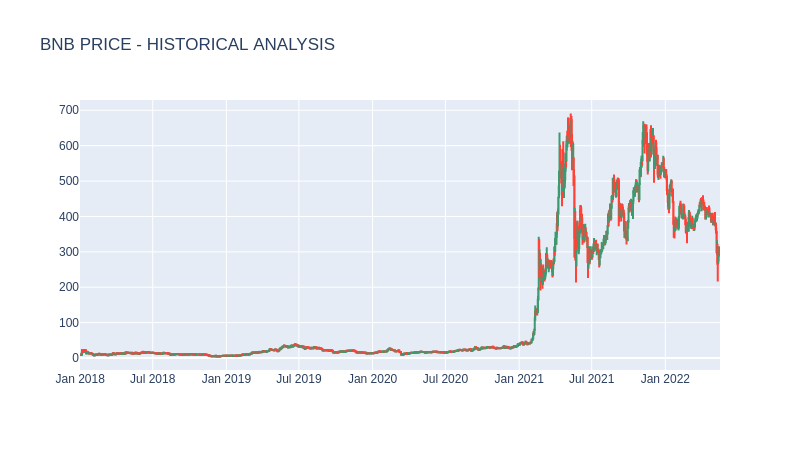

In [7]:
gitly = GitlyPlotter('github')
gitly.config_render('github')

data = go.Candlestick(x = df["Date"], open = df["Open"],high = df["High"], low = df["Low"], close = df["Close"])
figure = go.Figure(data=data)

figure.update_layout(title = "BNB PRICE - HISTORICAL ANALYSIS", xaxis_rangeslider_visible = False)

gitly.show(figure)

As we can see, the prices start to go higher after 2021's january, reaching your peak in the middle of the first semester of 2021

In [44]:
#Now let's see te variation between the top and botton prices

x1 = df["Close"].max()
x2 = df["Close"].min()

x = (x1/x2)*100

print(x,"%")

14920.21045633444 %


We can see a variation of almost 15000%!

#**Now, it's time to make our predictions**
###Let's see if it works hahahahaha

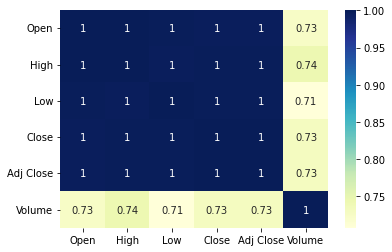

In [9]:
#Before to make our predicitons, we have to get the correlation between the values

correlation = df.corr()

import matplotlib.pyplot as plt
import seaborn as sns

figure = sns.heatmap(correlation, cmap = "YlGnBu",annot = True)

plt.show(figure)

The volume column has a low correlation with the other columns in comparison. But, the correlations are almost perfect betwenn prices columns (open, high, low and close). To continue our study, we'll focus our predictions in these columns.

To continue our study, let's define our prediction time, i decided to predict until the next 60 days (considering i made this study in 2021's may).

The Facebook Prophet model only works with data that contains a string time-series format in a column called “ds” and continuous values in a column called “y”.

In [11]:
from fbprophet import Prophet

df_pred = df[['Date','Close']]
df_pred.columns = ['ds','y'] #Changing column's names

df_pred

,ds,y
0,2018-01-01,8.414610
1,2018-01-02,8.837770
2,2018-01-03,9.535880
3,2018-01-04,9.213990
4,2018-01-05,14.917200
...,...,...
1593,2022-05-13,290.584198
1594,2022-05-14,297.387604
1595,2022-05-15,312.007721
1596,2022-05-16,297.710114


In [13]:
prophet = Prophet()
prophet.fit(df_pred)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [16]:
prediction = prophet.make_future_dataframe(periods = 60) #creating a dataframe conteining date value

print(prediction)

             ds
0    2018-01-01
1    2018-01-02
2    2018-01-03
3    2018-01-04
4    2018-01-05
...         ...
1653 2022-07-12
1654 2022-07-13
1655 2022-07-14
1656 2022-07-15
1657 2022-07-16

[1658 rows x 1 columns]


In [18]:
forecast = prophet.predict(prediction)

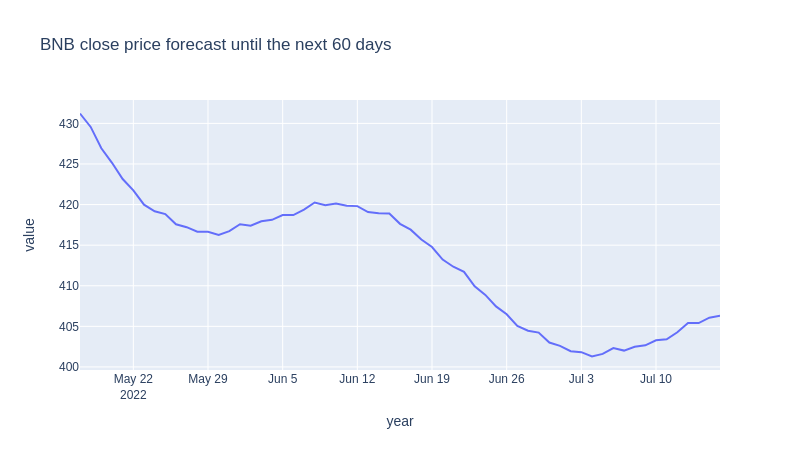

In [37]:
import plotly.express as px

df_fig = forecast.query('ds >= "2022-05-17"')

fig = px.line(df_fig, x = "ds", y = "yhat", title = 'BNB close price forecast until the next 60 days', labels = {'ds': 'year', 'yhat': 'value'}) #plotting our forecast


gitly.show(fig)

In [42]:
# now, let's see BNB percentile of variation

x1 = forecast['yhat'].min()
x2 = forecast['yhat'].max()

x = (x2/x1)

print(x,"%")

-21.022759498565506 %


We can see for the next 60 days the price will drop around 21% (run to the hills hahaha).

#**Conclusions**

The BNB coin is the most valuable coins in cryptomarket today. Unfortunately, some events that happens today made all of cryptocurrencies drops, and with the characteristic volatility of the market, your price goes down. 

As we see with the forecast, despite some actual events, the BNB price tends to drop during the days, what makes new and old investors became bearish (some crypto slang when you bet in some cryptocurrent decrease).